## Check segmentation

Overlay cell segmentation polygons on the original image.

### Setup

In [1]:
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt

import fishtank as ft

### Check FOV 

In [20]:
image_path = Path("/lab/weissman_imaging/puzheng/PE_LT/20240508-4T1fullyEdited_zombie_IntBCv2new_editv3/")
polygons_path = Path("/lab/weissman_imaging/4T1/240508_preedited_zombie/cellpose_polygons/")
series = "H0M1"
color = 405

Load polygons

In [23]:
fov = 20
polygons = gpd.read_file(polygons_path / f"polygons_{fov}.json")
polygons = polygons.set_crs(None, allow_override=True)

Overlay z slice

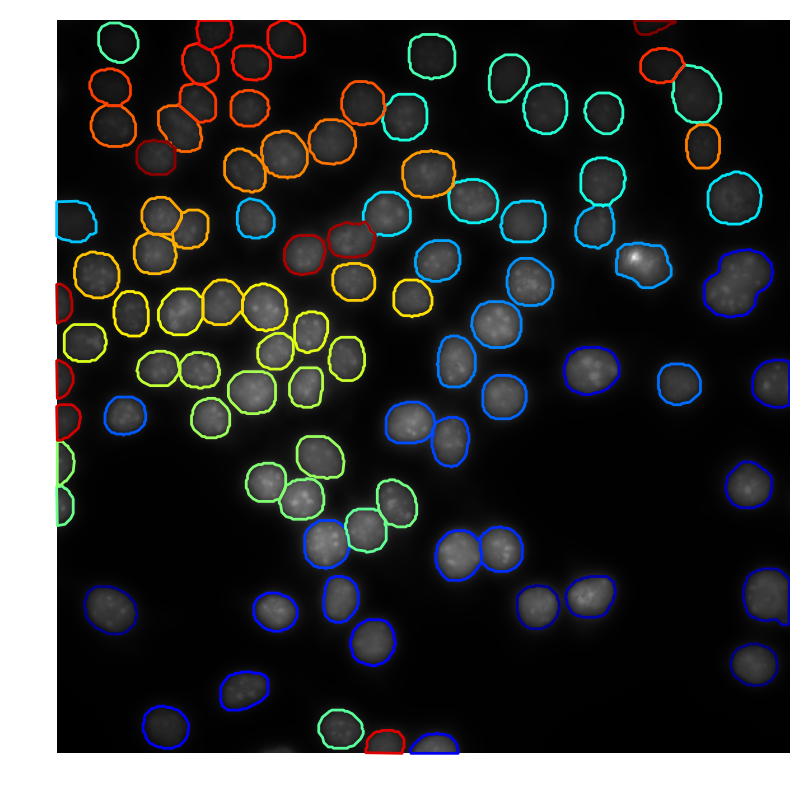

In [24]:
z = 20
img, attr = ft.io.read_fov(image_path, fov, series, z_slices=z, colors=color)
fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
ax.imshow(img, cmap="gray", origin="lower")
polygons.query("z == @z").plot(column="cell", facecolor="none", cmap="jet", ax=ax)
ax.axis("off");

Polygons 3D

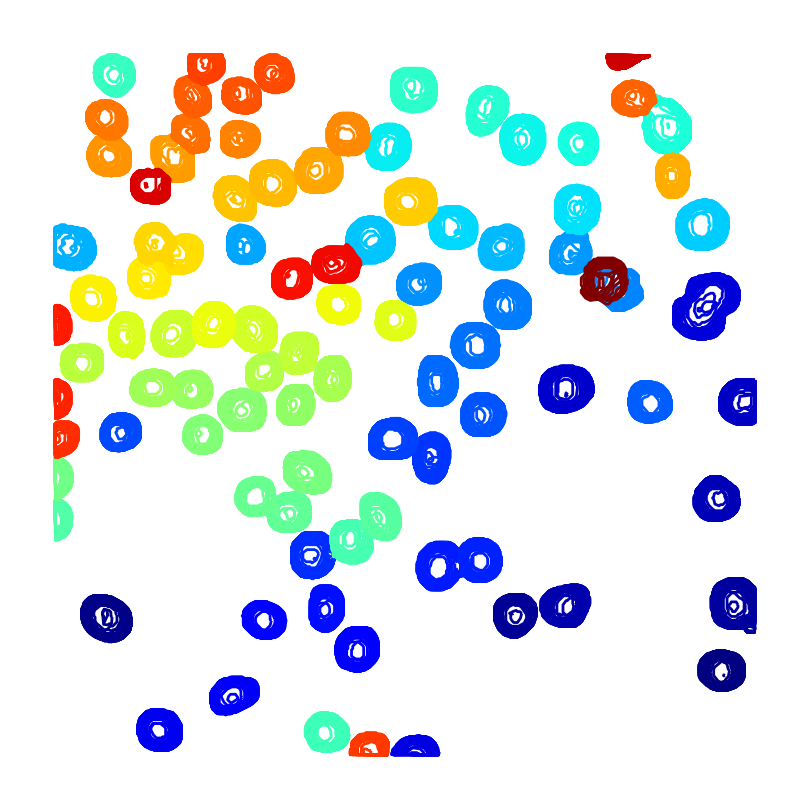

In [25]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
polygons.plot(column="cell", facecolor="none", cmap="jet", ax=ax)
ax.axis("off");